# **Simple MLP for PIMA Indian Dataset**

In [1]:
!git clone https://github.com/deepanrajm/deep_learning.git

Cloning into 'deep_learning'...
remote: Enumerating objects: 2716, done.
remote: Counting objects: 100% (49/49), done.
remote: Compressing objects: 100% (34/34), done.
remote: Total 2716 (delta 27), reused 32 (delta 15), pack-reused 2667 (from 2)
Receiving objects: 100% (2716/2716), 295.03 MiB | 23.06 MiB/s, done.
Resolving deltas: 100% (151/151), done.
Updating files: 100% (2450/2450), done.


In [2]:
!ls

deep_learning  sample_data


**Importing Packages**

In [3]:
from keras.models import Sequential
from keras.layers import Dense
import numpy

In [4]:
seed = 7
numpy.random.seed(seed)

**load pima indians dataset**

In [5]:
dataset = numpy.loadtxt("deep_learning/MLP_Pima/pima-indians-diabetes.csv", delimiter=",")

**split into input (X) and output (Y)**

In [6]:
X = dataset[:,0:8]
Y = dataset[:,8]

**create model**

In [7]:
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(24, activation='relu'))
model.add(Dense(24, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


**Compile model**

In [8]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

**Fit the Model**

In [9]:
h= model.fit(X, Y,validation_split=0.2, epochs=400, batch_size=10)

Epoch 1/400
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.3748 - loss: 3.4249 - val_accuracy: 0.5844 - val_loss: 0.6758
Epoch 2/400
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6226 - loss: 0.6877 - val_accuracy: 0.6299 - val_loss: 0.6675
Epoch 3/400
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6482 - loss: 0.6434 - val_accuracy: 0.6429 - val_loss: 0.6649
Epoch 4/400
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6541 - loss: 0.6245 - val_accuracy: 0.6494 - val_loss: 0.6688
Epoch 5/400
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7202 - loss: 0.5875 - val_accuracy: 0.6558 - val_loss: 0.6644
Epoch 6/400
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7174 - loss: 0.5980 - val_accuracy: 0.5779 - val_loss: 0.6980
Epoch 7/400
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6741 - loss: 0.6101 - val_accuracy: 0.6429 - val_loss: 0.6634
Epoch 8/400
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7101 - loss: 0.5730 - val_accuracy: 0.6234 - v

**Evaluate The Model**

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


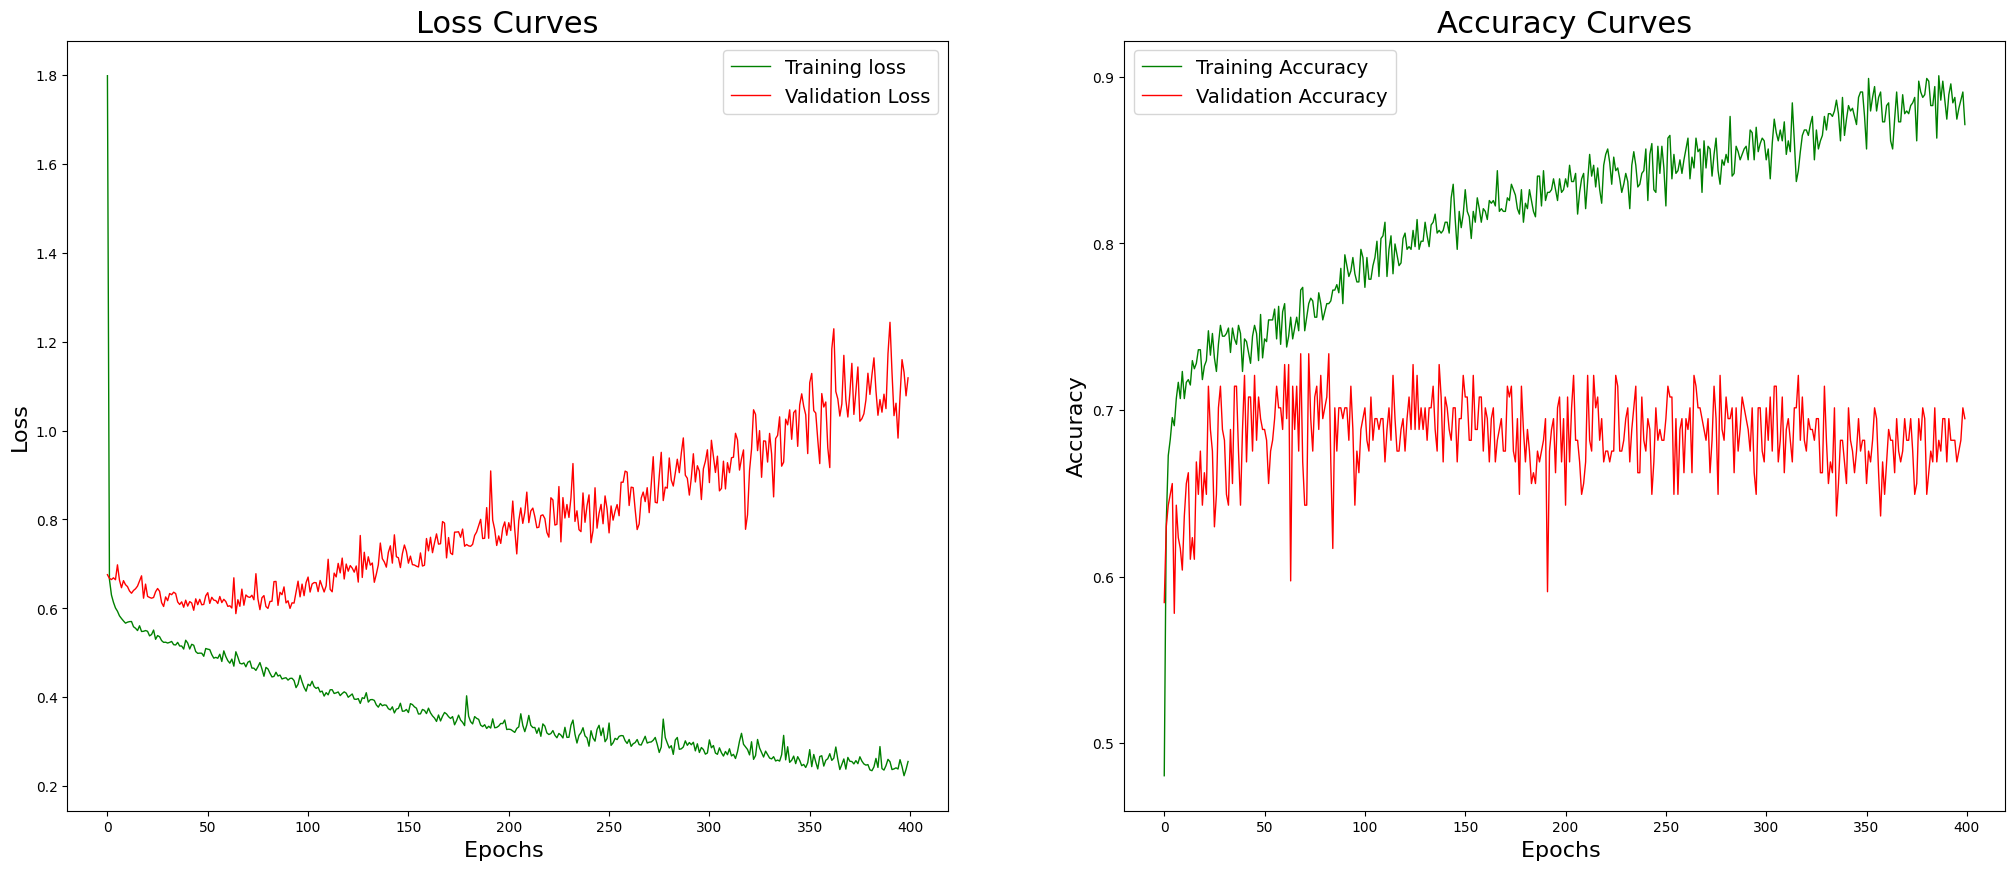

In [11]:
import matplotlib.pyplot as plt
print(h.history.keys())

# Loss Curves
plt.figure(figsize=(25, 10))
plt.subplot(1, 2, 1)
plt.plot(h.history['loss'],'-g',linewidth=1.0)
plt.plot(h.history['val_loss'],'-r',linewidth=1.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=14)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=22)

# Accuracy Curves
plt.subplot(1, 2, 2)
plt.plot(h.history['accuracy'],'-g',linewidth=1.0)
plt.plot(h.history['val_accuracy'],'-r',linewidth=1.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=14)
plt.xlabel('Epochs ',fontsize=16)

plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=22)
plt.show()

In [12]:
scores = model.evaluate(X, Y)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8800 - loss: 0.2734 
compile_metrics: 85.81%
